In [15]:
from pathlib import Path

import imageio as iio
import napari
import numpy as np
from skimage import color, util

In [3]:
viewer = napari.Viewer()

In [7]:
project_dir = Path('..')
project_dir.resolve()

WindowsPath('C:/Users/cgusb/projects/archipelago')

In [8]:
pink_path = Path(project_dir / 'inspiration/seashell-pink.png')
pink_path.exists()

True

In [9]:
pink_img = iio.imread(pink_path)
print(f'{pink_img.shape=}')
print(f'{pink_img.dtype=}')

pink_img.shape=(768, 1024, 3)
pink_img.dtype=dtype('uint8')


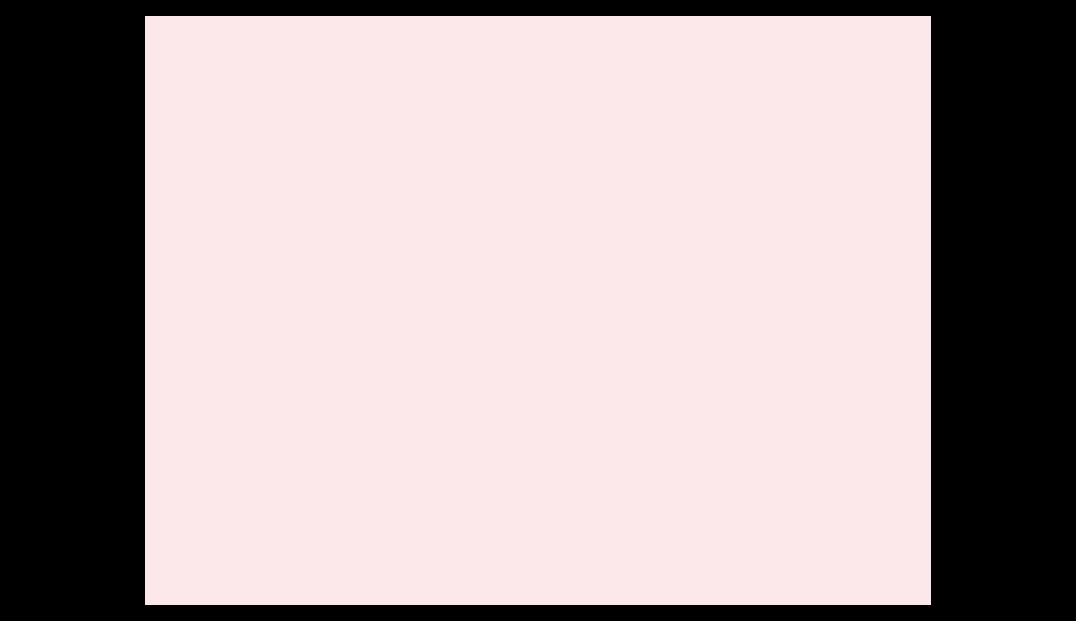

In [10]:
viewer.add_image(pink_img)
napari.utils.nbscreenshot(viewer, canvas_only=True)

In [11]:
pink_hsv = color.rgb2hsv(pink_img)
print(f'{pink_hsv.shape=}')
print(f'{pink_hsv.dtype=}')

pink_hsv.shape=(768, 1024, 3)
pink_hsv.dtype=dtype('float64')


pink_h_mean=0.976190476190477
pink_s_mean=0.08333333333333325
pink_v_mean=0.9882352941176448
pink_h_rgb.dtype=dtype('uint8')


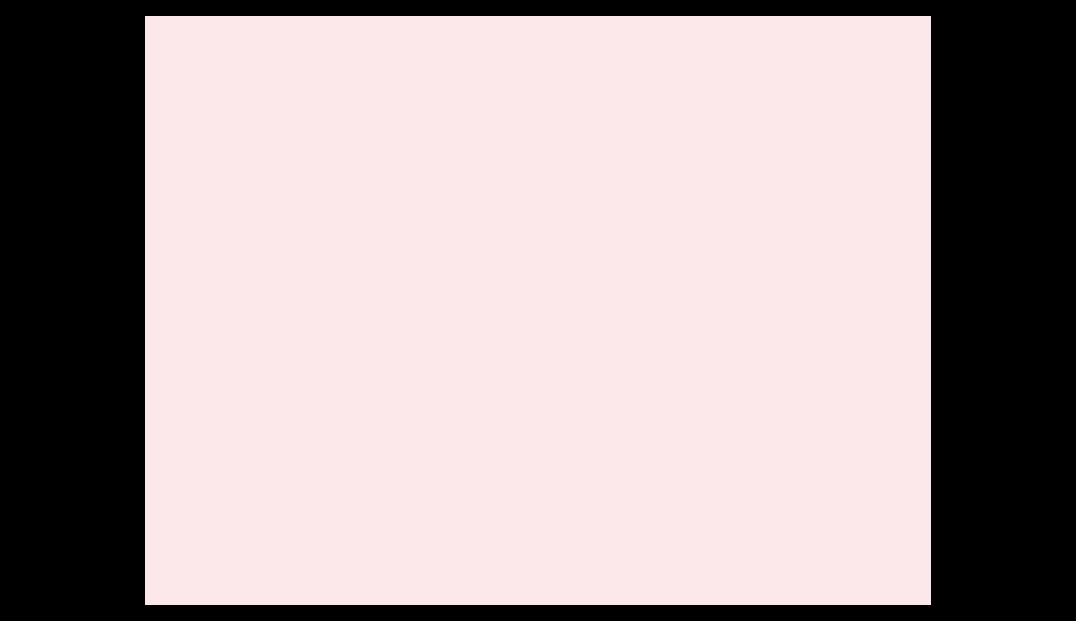

In [17]:
pink_h_hsv = np.zeros_like(pink_hsv)
pink_h_mean = pink_hsv[:, :, 0].mean()
pink_s_mean = pink_hsv[:, :, 1].mean()
pink_v_mean = pink_hsv[:, :, 2].mean()
print(f'{pink_h_mean=}')
print(f'{pink_s_mean=}')
print(f'{pink_v_mean=}')
pink_h_hsv[:, :, 0] = pink_h_mean
pink_h_hsv[:, :, 1] = pink_s_mean
pink_h_hsv[:, :, 2] = pink_v_mean

pink_h_rgb = color.hsv2rgb(pink_h_hsv)
pink_h_rgb = util.img_as_ubyte(pink_h_rgb)
print(f'{pink_h_rgb.dtype=}')

viewer.add_image(pink_h_rgb)
napari.utils.nbscreenshot(viewer, canvas_only=True)

## Load first frame of video

In [19]:
img_path = Path(project_dir / 'videos/mc-laying/images/mc-laying-001.jpg')
img = iio.imread(img_path)
print(f'{img.shape=}')
print(f'{img.dtype=}')

img.shape=(1920, 1080, 3)
img.dtype=dtype('uint8')
